In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [24]:
train = pd.read_csv(r'C:\Users\hp\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\hp\Downloads\test (1).csv')

In [25]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [27]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
train.duplicated().sum()

0

In [55]:
y = train['price_range']
X = train.drop('price_range', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=26)

In [57]:
model = RandomForestClassifier()

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [61]:
acc = accuracy_score(y_test, pred)
acc

0.868

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       122
           1       0.88      0.79      0.84       131
           2       0.80      0.82      0.81       125
           3       0.90      0.89      0.90       122

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



### HpyerParameter Tuning Using GridSearchCV

In [77]:
%%time
param_grid = {
    'n_estimators': [100, 150, 200],       
    'max_depth': [10, 15, 20],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [2, 3, 4],           
}

CPU times: total: 0 ns
Wall time: 0 ns


In [78]:
%%time
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)
CPU times: total: 4min 26s
Wall time: 4min 28s


In [79]:
print(grid_search.best_score_)

0.8813333333333334


In [80]:
model = grid_search.best_estimator_

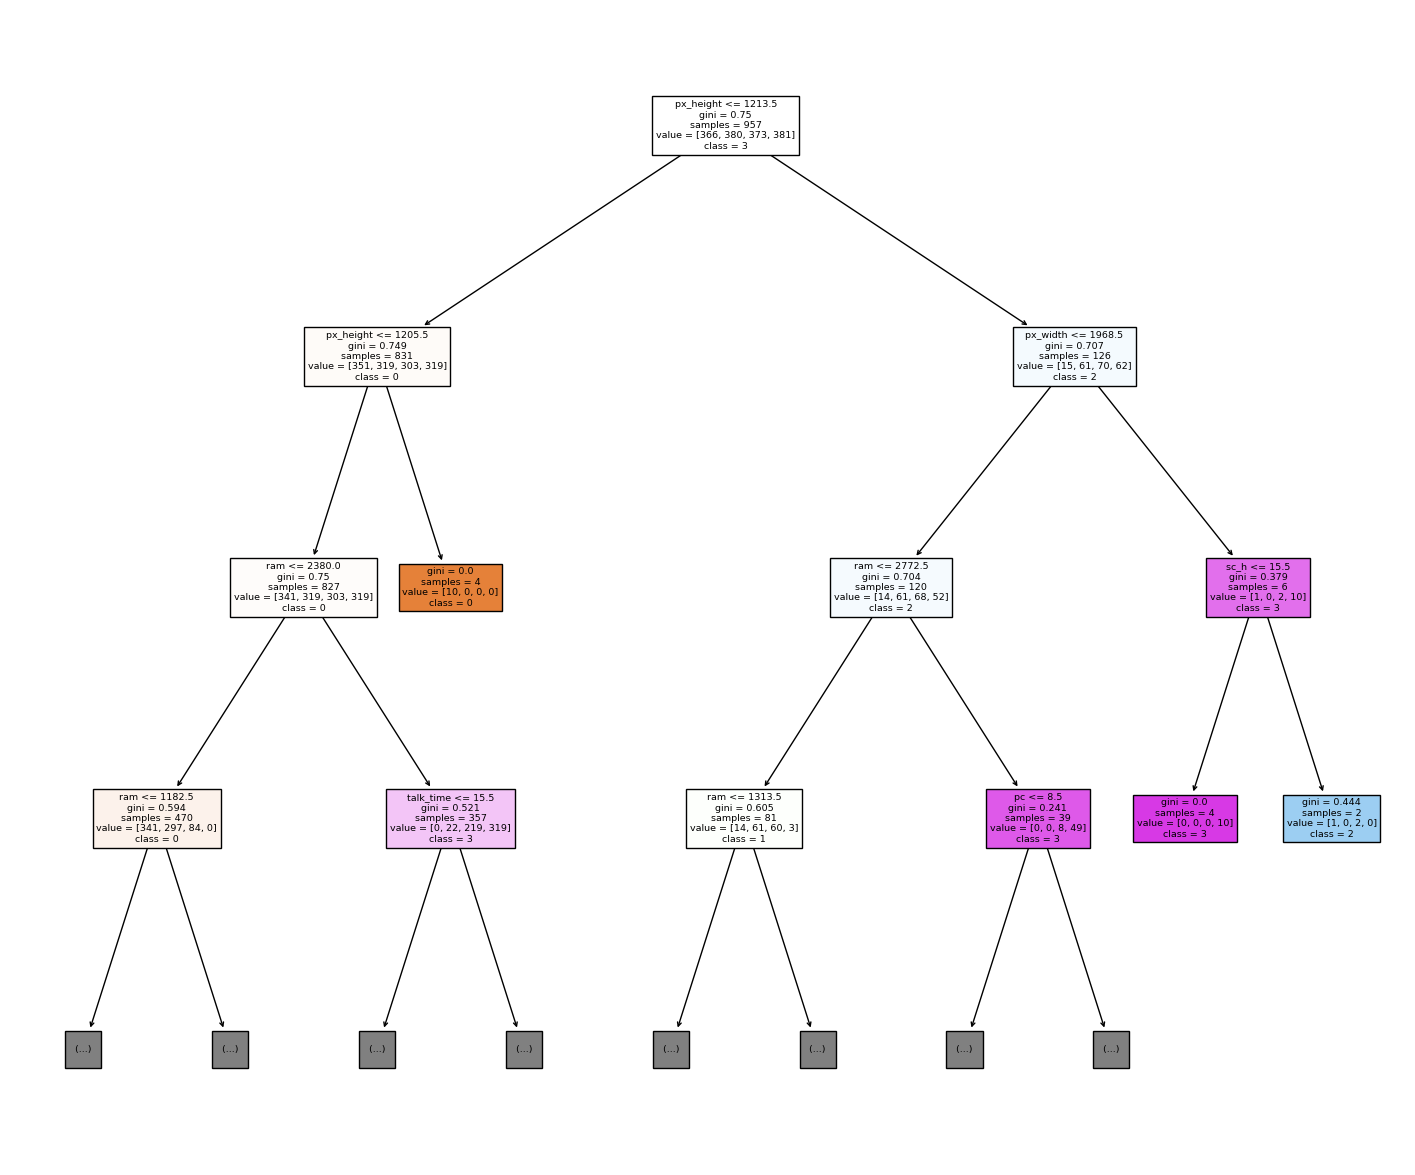

In [99]:
one_tree = model.estimators_[0]

plt.figure(figsize=(18, 15))
plot_tree(one_tree, max_depth=3, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'])
plt.show()